install libraries

In [ ]:
!pip install pandas

In [ ]:
import numpy as np



**linear Regression**

In [ ]:
class Linear_Regression:


  def __init__(self, learning_rate, no_of_iteration):

    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration




  def fit(self, X, Y ):

    self.m,self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iteration):
      self.update_weights()




  def update_weights(self,):
    Y_prediction = self.predict(self.X)
    dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db




  def predict(self, X):
    return X.dot(self.w) + self.b







In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
#data preprocessing
salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#splitting features
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values



In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
#splitting data
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state=2)


In [ ]:
#training the linear regrssion model
model = Linear_Regression(learning_rate=0.02,no_of_iteration = 10000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
#printing the parameter values (weight&bias)
print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  9512.944987627436
bias =  23707.81324657524


y = 9512x + 23707

In [ ]:
#predicting salary value
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


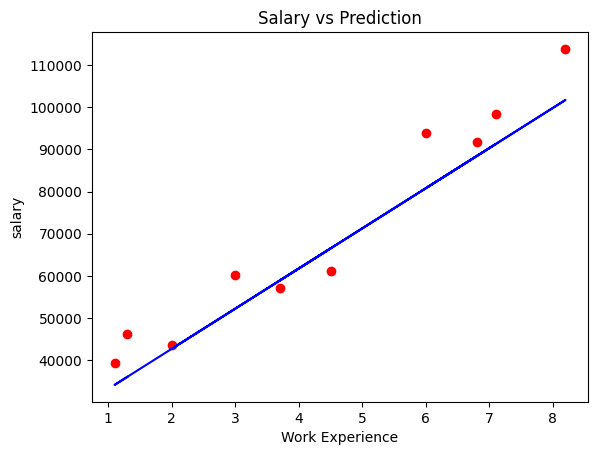

In [ ]:
#visualizing predictvsactual
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_test,test_data_prediction,color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('salary')
plt.title('Salary vs Prediction')
plt.show()